<a href="https://colab.research.google.com/github/Aniket658/GN22CDBDS001_2159919/blob/main/03_TimeSeriesAnalysis_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pandas==1.2.0
!pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 3.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [1]:
import pandas as pd
import xlrd
df = pd.read_excel('Sample - Superstore.xls')
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

<a href="https://colab.research.google.com/github/a-forty-two/COG_GN22CDBDS001_MARCH_22/blob/main/03_TimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import itertools
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df.head()
# Taking a Look at Dataset

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
colNames = df.columns 
for i, feature in enumerate(colNames):
  print(colNames[i] + " " + str(len(df[feature].value_counts())))
# Printing all column names

Row ID 9994
Order ID 5009
Order Date 1237
Ship Date 1334
Ship Mode 4
Customer ID 793
Customer Name 793
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Product ID 1862
Category 3
Sub-Category 17
Product Name 1850
Sales 6144
Quantity 14
Discount 12
Profit 7545


In [5]:
df.Category.value_counts()
# Taking a look at unique categories

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [12]:
data_furniture = df.loc[df['Category']=='Furniture']  # LOC-> :,:
#data.head()
# Out of 3 Categories let us first analyse 'Furniture'
print(data_furniture['Order Date'].min()) # First order date
print(data_furniture['Order Date'].max()) # last order date

2014-01-06 00:00:00
2017-12-30 00:00:00


In [13]:
print(len(data_furniture))
data_furniture["Order Date"].value_counts().count()
# Many of the Order dates are missing when compared to number of rows in dataset for 'Furniture'

2121


889

In [14]:
# Let us group by order date so that we find sum of sales for particular order date
data_grouped = data_furniture.groupby('Order Date')
data_grouped = data_grouped['Sales'].sum().reset_index()
data_grouped.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [15]:
# As some of the order dates are missing, hence we need to resample data
data_grouped.set_index('Order Date', inplace=True)
# Monthly sampling is suits our problem statement as we can analyse sales month-wise.
# Also it will help us to deal with missing order dates for a given month
y = data_grouped['Sales'].resample('MS').mean() # average sales of month will be a BETTER prediction than TOTAL sales 
y.head()


Order Date
2014-01-01    480.194231
2014-02-01    367.931600
2014-03-01    857.291529
2014-04-01    567.488357
2014-05-01    432.049187
Freq: MS, Name: Sales, dtype: float64

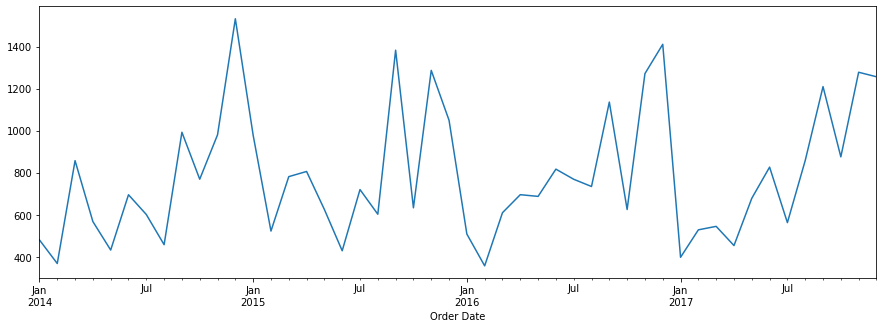

In [16]:
# Plotting Sales vs. Month
plt.figure()
y.plot(figsize=(15,5))
plt.show()


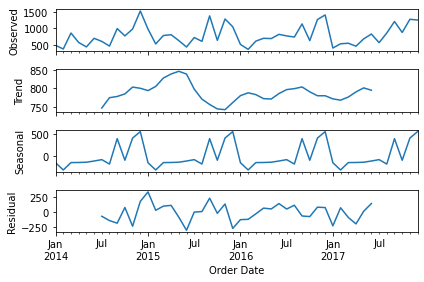

In [17]:
# Let us take a look at Trend (Direction), Seasonal (Pattern), Residual (Noise)
decomposition = sm.tsa.seasonal_decompose(y, model='additive')

fig = decomposition.plot()
plt.show() 

# Trend is positive
# Seasonal -> sales is dipping in Jan, July and then rising.

In [18]:
p = d = q = range(0,2) # VALUE generators between [0,1] 
pdq = list(itertools.product(p,d,q))
print(pdq)

# p: Trend autoregression order.
# d: Trend difference order.
# q: Trend moving average order.

# Generating all values for p,d,q 

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [19]:
# YEARs -> our repeatation is ANNUAL in nature 
seasons = 12 # My ananlysis is for monthly data, hence seasons = 12 i.e. 1 year
# LIST COMPREHENSION -> (0,0,0) -> (0,0,0,12)
seasonal_pdq = [   (x[0],x[1],x[2], seasons)  for x in pdq] # if x was (0,1,0), -> (0,1,0,12)

# seasonal_pdq = (P,D,Q,seasons)

# P: Seasonal autoregressive order.
# D: Seasonal difference order.
# Q: Seasonal moving average order.
# seasons: The number of time steps for a single seasonal period.

print('SARIMAX individual MODEL = {} X {}'.format(pdq[5], seasonal_pdq[0]))
print('SARIMAX individual MODEL = {} X {}'.format(pdq[5], seasonal_pdq[1]))
print('SARIMAX individual MODEL = {} X {}'.format(pdq[5], seasonal_pdq[2]))
print('SARIMAX individual MODEL = {} X {}'.format(pdq[5], seasonal_pdq[3]))
# Priniting some of the possible combinations for trend order and seasonal order for SARIMAX individual MODEL

SARIMAX individual MODEL = (1, 0, 1) X (0, 0, 0, 12)
SARIMAX individual MODEL = (1, 0, 1) X (0, 0, 1, 12)
SARIMAX individual MODEL = (1, 0, 1) X (0, 1, 0, 12)
SARIMAX individual MODEL = (1, 0, 1) X (0, 1, 1, 12)


In [20]:
# AKAIKE INFORMATION CRITERION (for a while now, this is a PROBABILISTIC formula to calculate
# error in liklihood/probability calculation)
# AIC = 2k - 2 ln (L) 

# Since AIC is loss estimation hence lesser the AIC better the model is for given p,d,q and P,D,Q,seasons
# we look for minimum AIC and store trend p,d,q and seasonal P,D,Q for corresponding minimum AIC
# This is Exhaustive Hyperparameter Tuning -> Grid Search

min_pdq = (999,999,999) # Initially a large value as we don'know ans yet.
min_spdq = (999,999,999,12) # Initially a large value as we don'know ans yet.
min_AIC = 999 # Initially a large value as we don'know ans yet.
for param in pdq:
  for sparam in seasonal_pdq:
    try:
      model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=sparam, enforce_stationarity=False) # Train model
      predictions = model.fit() # make predictions
      print('Model={}X{}. AIC= {}'.format(param, sparam, predictions.aic))
      if(predictions.aic < min_AIC): # if we have found minimum loss
        min_pdq = param # Minimum Trend order
        min_spdq = sparam # Minimum Seasonal order
        min_AIC = predictions.aic # Minimum loss
    except Exception as e:
      print(e)
      continue

print('**** Smallest PDQ,SPDQ is *****')
print(min_AIC)
print(min_pdq)
print(min_spdq)


Model=(0, 0, 0)X(0, 0, 0, 12). AIC= 769.0817523205916
Model=(0, 0, 0)X(0, 0, 1, 12). AIC= 548.1772347587046
Model=(0, 0, 0)X(0, 1, 0, 12). AIC= 477.71701309202774
maxlag should be < nobs
Model=(0, 0, 0)X(1, 0, 0, 12). AIC= 497.2314433418337
Model=(0, 0, 0)X(1, 0, 1, 12). AIC= 478.3653805749645
Model=(0, 0, 0)X(1, 1, 0, 12). AIC= 318.0047199116341
maxlag should be < nobs
Model=(0, 0, 1)X(0, 0, 0, 12). AIC= 720.9252270739973


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Model=(0, 0, 1)X(0, 0, 1, 12). AIC= 514.7587049639892
Model=(0, 0, 1)X(0, 1, 0, 12). AIC= 466.5556513479083
maxlag should be < nobs
Model=(0, 0, 1)X(1, 0, 0, 12). AIC= 498.8314925544705
Model=(0, 0, 1)X(1, 0, 1, 12). AIC= 467.1039211192387
Model=(0, 0, 1)X(1, 1, 0, 12). AIC= 319.9884876946219
maxlag should be < nobs
Model=(0, 1, 0)X(0, 0, 0, 12). AIC= 677.894766859465
Model=(0, 1, 0)X(0, 0, 1, 12). AIC= 488.7012043020711
Model=(0, 1, 0)X(0, 1, 0, 12). AIC= 486.63785671879367
maxlag should be < nobs
Model=(0, 1, 0)X(1, 0, 0, 12). AIC= 497.78896630044073
Model=(0, 1, 0)X(1, 0, 1, 12). AIC= 482.6001351199606
Model=(0, 1, 0)X(1, 1, 0, 12). AIC= 319.7714068109211
maxlag should be < nobs
Model=(0, 1, 1)X(0, 0, 0, 12). AIC= 649.9056176746318
Model=(0, 1, 1)X(0, 0, 1, 12). AIC= 463.70341352306565
Model=(0, 1, 1)X(0, 1, 0, 12). AIC= 458.8768954885655
maxlag should be < nobs
Model=(0, 1, 1)X(1, 0, 0, 12). AIC= 486.1833987523838
Model=(0, 1, 1)X(1, 0, 1, 12). AIC= 455.5706641530194
Model=(0, 1, 1

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [21]:
#(1, 1, 1) X (1, 1, 0, 12) is the best parameter

model = sm.tsa.statespace.SARIMAX(y, order=min_pdq, seasonal_order= min_spdq, enforce_stationarity=False)
#(1, 1, 1) X (1, 1, 0, 12)
results = model.fit()
results.summary() 
# results.summary()

# Evaluating the minimum loss parameter (p,d,q, P,D,Q,seasons)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -145.301
Date:                            Wed, 06 Apr 2022   AIC                            298.602
Time:                                    12:57:58   BIC                            302.966
Sample:                                01-01-2014   HQIC                           299.630
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1280      0.276      0.464      0.643      -0.412       0.669
ma.L1         -0.9998      0.450     -2.223      0.026      -1.881      -0.118
ar.S.L12      -0.2811      0.154     -1.826      0.068      -0.583       0.021
sigma2      3.028e+04   1.49e-05   2.04e+09      0.000    3.03e+04    3.03e+04
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.77
Prob(Q):                               nan   Prob(JB):                         0.68
Heteroskedasticity (H):               0.67   Skew:                            -0.22
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.69e+24. Standard errors may be unstable.
"""

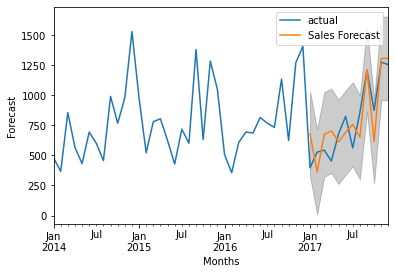

In [24]:
# Time to plot predictions

pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='actual') # ACTUAL DATA PLOT
pred.predicted_mean.plot(ax=ax, label='Sales Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.2)
ax.set_xlabel('Months')
ax.set_ylabel('Forecast')
plt.legend()
plt.show() 

# Our expected sales (predicted by SARIMAX ) is very close to observed sales.

**Hyperparameter**

In [23]:
# Hyperparameter
# p: Trend autoregression order.
# d: Trend difference order.
# q: Trend moving average order.

# P: Seasonal autoregressive order.
# D: Seasonal difference order.
# Q: Seasonal moving average order.
# seasons: The number of time steps for a single seasonal period. (it constant just need to assign once as per dataset and problem statement)